In [465]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [466]:
df = pd.read_csv("C:/resources/1weeks/abalone.csv", engine ="python")
#데이터 확인
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [467]:
#성별은 문자열로 되어 있으므로 정수형으로 변환
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [468]:
#카테고리 확인
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [469]:
#Rings의 값별 데이터 갯수 확인
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [470]:
# Ring 값이 28에 가장 가까운 데이터 찾아서 복사후 Ring 값을 28로 변경
closest_data = df.iloc[(df['Rings'] - 28).abs().argsort()[:1]]
new_data = closest_data.copy()
new_data['Rings'] = 28

# 원본 데이터에 새로운 데이터 추가
df = pd.concat([df, new_data], ignore_index=True)

In [471]:
#Rings에 28 있는지 확인
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
28      1
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [472]:
#Rings를 나눌 구간을 정하고 레이블 정의
bins = [0, 10, 20, df['Rings'].max()]
labels = ['Small', 'Medium', 'Large']

# 새로운 컬럼 'Ring_Group'을 추가해서 구간 나누기
df['Ring_Group'] = pd.cut(df['Rings'], bins=bins, labels=labels, right=False)
df['Ring_Group'].value_counts()

Small     2096
Medium    2019
Large       62
Name: Ring_Group, dtype: int64

In [473]:
#겉측지 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Ring_Group        1
dtype: int64

In [474]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Ring_Group        0
dtype: int64

Text(0,0.5,'Count')

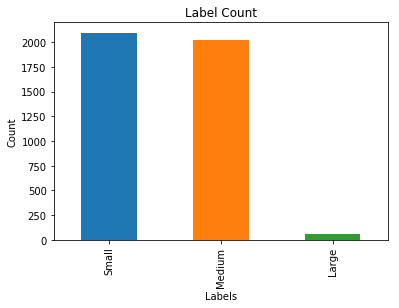

In [475]:
# 레이블별 갯수 확인
label_counts = df['Ring_Group'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [478]:
df_LE = df.filter(regex='Length') 
df_HE = df.filter(regex='Height')

In [479]:
df_LE.insert(1, 'Ring_Group', df['Ring_Group'])
df_HE.insert(1, 'Ring_Group', df['Ring_Group'])

In [480]:
df_LE

,Length,Ring_Group
0,0.455,Medium
1,0.350,Small
2,0.530,Small
3,0.440,Medium
4,0.330,Small
5,0.425,Small
6,0.530,Large
7,0.545,Medium
8,0.475,Small
9,0.550,Medium


In [481]:
df_HE

,Height,Ring_Group
0,0.095,Medium
1,0.090,Small
2,0.135,Small
3,0.125,Medium
4,0.080,Small
5,0.095,Small
6,0.150,Large
7,0.125,Medium
8,0.125,Small
9,0.150,Medium


In [482]:
df_LE['Ring_Group'].value_counts()

Small     2096
Medium    2019
Large       62
Name: Ring_Group, dtype: int64

In [483]:
df_HE['Ring_Group'].value_counts()

Small     2096
Medium    2019
Large       62
Name: Ring_Group, dtype: int64

In [486]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_LE['Ring_Group'] = label_encoder.fit_transform(df_LE['Ring_Group'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_HE['Ring_Group'] = label_encoder.fit_transform(df_HE['Ring_Group'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [488]:
df_LE['Ring_Group'].value_counts()

2    2096
1    2019
0      62
Name: Ring_Group, dtype: int64

In [489]:
df_HE['Ring_Group'].value_counts()

2    2096
1    2019
0      62
Name: Ring_Group, dtype: int64

In [490]:
df_LE_Y=df_LE['Ring_Group']
df_LE_X=df_LE.drop('Ring_Group',axis=1)
df_LE_X.head()

,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330


In [492]:
#훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train_LE, X_test_LE, y_train_LE, y_test_LE = train_test_split(df_LE_X, 
                                                    df_LE_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [493]:
df_HE_Y = df_HE['Ring_Group']
df_HE_Y.head()

0    1
1    2
2    2
3    1
4    2
Name: Ring_Group, dtype: int64

In [494]:
df_HE_X=df_HE.drop('Ring_Group',axis=1)
df_HE_X.head()

,Height
0,0.095
1,0.090
2,0.135
3,0.125
4,0.080


In [495]:
from sklearn.model_selection import train_test_split

X_train_HE, X_test_HE, y_train_HE, y_test_HE = train_test_split(df_HE_X, 
                                                    df_HE_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

<h2>높이와 길이를 각각 훈련과 테스트 데이터로 분리</h2>

In [496]:
X_train_LE.shape, X_test_LE.shape, y_train_LE.shape, y_test_LE.shape

((3132, 1), (1045, 1), (3132,), (1045,))

In [498]:
X_train_HE.shape, X_test_HE.shape, y_train_HE.shape, y_test_HE.shape

((3132, 1), (1045, 1), (3132,), (1045,))

In [499]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [500]:
# 입력과 출력을 하나의 배열로 결합
y_train_array_LE = np.array(y_train_LE)
train_set_LE = np.c_[X_train_LE, y_train_array_LE]

y_test_array_LE = np.array(y_test_LE)
test_set_LE = np.c_[X_test_LE, y_test_array_LE]

In [501]:
#3개의 데이터를 포함하도록 시퀀스 데이터를 생성
n_step = 3 

X_train_seq_LE, y_train_seq_LE = split_sequences(train_set_LE, n_step)
print(X_train_seq_LE.shape, y_train_seq_LE.shape)

X_test_seq_LE, y_test_seq_LE = split_sequences(test_set_LE, n_step)
print(X_test_seq_LE.shape, y_test_seq_LE.shape)

(3130, 3, 1) (3130,)
(1043, 3, 1) (1043,)


In [502]:
y_train_array_HE = np.array(y_train_HE)
train_set_HE = np.c_[X_train_HE, y_train_array_HE]

y_test_array_HE = np.array(y_test_HE)
test_set_HE = np.c_[X_test_HE, y_test_array_HE]

In [503]:
X_train_seq_HE, y_train_seq_HE = split_sequences(train_set_HE, n_step)
print(X_train_seq_HE.shape, y_train_seq_HE.shape)

X_test_seq_HE, y_test_seq_HE = split_sequences(test_set_HE, n_step)
print(X_test_seq_HE.shape, y_test_seq_HE.shape)

(3130, 3, 1) (3130,)
(1043, 3, 1) (1043,)


In [505]:
from tensorflow.keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_LE = to_categorical(y_train_seq_LE)
print(y_train_seq_LE.shape)

y_test_seq_LE = to_categorical(y_test_seq_LE)
print(y_test_seq_LE.shape)

(3130, 3)
(1043, 3)


In [506]:
y_train_seq_HE = to_categorical(y_train_seq_HE)
print(y_train_seq_HE.shape)

y_test_seq_HE = to_categorical(y_test_seq_HE)
print(y_test_seq_HE.shape)

(3130, 3)
(1043, 3)


In [507]:
n_timesteps, n_features, n_outputs = X_train_seq_LE.shape[1], X_train_seq_LE.shape[2], y_train_seq_LE.shape[1]
print(n_timesteps, n_features, n_outputs)

3 1 3


In [508]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

<h2>LSTM과 CNN을 혼합한 모델 생성</h2>

In [510]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_seq_HE.shape[1], X_train_seq_HE.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train_seq_HE.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [511]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 50)             16600     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_52 (Dense)             (None, 3)               

In [512]:
history = model.fit(X_train_seq_LE, y_train_seq_LE, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
89/89 [==============================] - 1s 3ms/step - loss: 0.8753 - accuracy: 0.5062 - val_loss: 0.7669 - val_accuracy: 0.5399
Epoch 2/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7294 - accuracy: 0.5151 - val_loss: 0.7699 - val_accuracy: 0.4920
Epoch 3/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7334 - accuracy: 0.5048 - val_loss: 0.7648 - val_accuracy: 0.5399
Epoch 4/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7252 - accuracy: 0.5343 - val_loss: 0.7603 - val_accuracy: 0.5431
Epoch 5/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7223 - accuracy: 0.5424 - val_loss: 0.7642 - val_accuracy: 0.5974
Epoch 6/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.5680 - val_loss: 0.7460 - val_accuracy: 0.5591
Epoch 7/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.5758 - val_loss: 0.7330 - val_accuracy: 0.6613
Epoch 8/20
89/89 [==

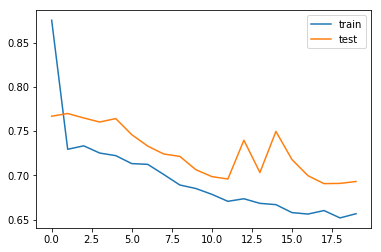

In [513]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [514]:
#훈련 데이터로 성능평가 실시
model.evaluate(X_train_seq_LE, y_train_seq_LE)

98/98 [==============================] - 0s 474us/step - loss: 0.6487 - accuracy: 0.6626


[0.6486566066741943, 0.6626198291778564]

In [515]:
#테스트 데이터로 성능평가 실시
model.evaluate(X_test_seq_LE, y_test_seq_LE)

33/33 [==============================] - 0s 469us/step - loss: 0.6465 - accuracy: 0.6826


[0.6465001106262207, 0.6826462149620056]

Confusion Matrix


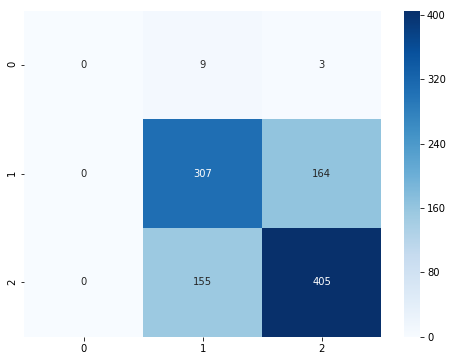

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LE, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_LE),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [517]:
base_loss,base_accuracy=model.evaluate(X_test_seq_LE, y_test_seq_LE)

model_file='C:/resources/2weeks/LE_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 406us/step - loss: 0.6465 - accuracy: 0.6826
model saved at  C:/resources/2weeks/LE_Model.h5
Accuracy >68.264621
Base Loss >0.65


In [518]:
model2 = Sequential()
model2.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_seq_HE.shape[1], X_train_seq_HE.shape[2])))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(50, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(y_train_seq_HE.shape[1], activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [519]:
model2.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 1, 50)             16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_54 (Dense)             (None, 3)               

In [520]:
history2 = model2.fit(X_train_seq_HE, y_train_seq_HE, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
89/89 [==============================] - 1s 4ms/step - loss: 0.8867 - accuracy: 0.4952 - val_loss: 0.7847 - val_accuracy: 0.4441
Epoch 2/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.5105 - val_loss: 0.7706 - val_accuracy: 0.6102
Epoch 3/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7322 - accuracy: 0.4909 - val_loss: 0.7770 - val_accuracy: 0.4441
Epoch 4/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.5353 - val_loss: 0.7661 - val_accuracy: 0.5399
Epoch 5/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7309 - accuracy: 0.5186 - val_loss: 0.7743 - val_accuracy: 0.4441
Epoch 6/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7321 - accuracy: 0.5211 - val_loss: 0.7700 - val_accuracy: 0.4441
Epoch 7/20
89/89 [==============================] - 0s 1ms/step - loss: 0.7274 - accuracy: 0.5289 - val_loss: 0.7721 - val_accuracy: 0.4441
Epoch 8/20
89/89 [==

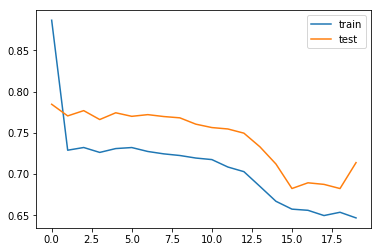

In [521]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [522]:
model2.evaluate(X_train_seq_HE, y_train_seq_HE)

98/98 [==============================] - 0s 515us/step - loss: 0.6502 - accuracy: 0.6610


[0.6501606702804565, 0.6610223650932312]

In [523]:
model2.evaluate(X_test_seq_HE, y_test_seq_HE)

33/33 [==============================] - 0s 688us/step - loss: 0.6586 - accuracy: 0.6453


[0.6586031913757324, 0.6452540755271912]

Confusion Matrix


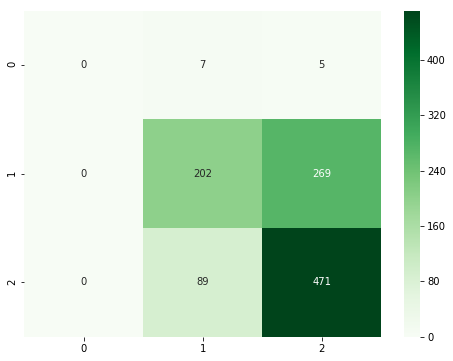

In [524]:
y_test_arg=np.argmax(y_test_seq_HE, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_HE),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [525]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_HE, y_test_seq_HE)

model_file2='C:/resources/2weeks/HE_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 438us/step - loss: 0.6586 - accuracy: 0.6453
model saved at  C:/resources/2weeks/HE_Model.h5
Accuracy >64.525408
Base Loss >0.66


<h2>Pre-trained Model</h2>

In [526]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [527]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_LE, y_test_seq_LE)

33/33 [==============================] - 0s 531us/step - loss: 0.6465 - accuracy: 0.6826


[0.6465001106262207, 0.6826462149620056]

In [528]:
base_model.evaluate(X_test_seq_HE, y_test_seq_HE)

33/33 [==============================] - 0s 656us/step - loss: 1.1676 - accuracy: 0.5369


[1.1675941944122314, 0.536912739276886]

In [529]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  7


In [530]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [531]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(50, activation='relu'))
new_model.add(layers.Dense(n_outputs, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 50)             16600     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_55 (Dense)             (None, 50)              

In [532]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.Conv1D object at 0...,conv1d,False
1,<keras.layers.pooling.MaxPooling1D object at 0...,max_pooling1d,False
2,<keras.layers.recurrent_v2.LSTM object at 0x00...,lstm_25,False
3,<keras.layers.core.Dropout object at 0x0000023...,dropout,False
4,<keras.layers.core.Flatten object at 0x0000023...,flatten_5,False
5,<keras.layers.core.Dense object at 0x00000236A...,dense_51,False
6,<keras.layers.core.Dense object at 0x000002369...,dense_55,True
7,<keras.layers.core.Dense object at 0x00000236A...,dense_56,True


In [533]:
history3 = new_model.fit(X_train_seq_HE, y_train_seq_HE, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 1s 3ms/step - loss: 0.8590 - accuracy: 0.5055 - val_loss: 0.7648 - val_accuracy: 0.4441
Epoch 2/20
89/89 [==============================] - 0s 807us/step - loss: 0.7331 - accuracy: 0.4995 - val_loss: 0.7660 - val_accuracy: 0.4441
Epoch 3/20
89/89 [==============================] - 0s 750us/step - loss: 0.7283 - accuracy: 0.5172 - val_loss: 0.7648 - val_accuracy: 0.5399
Epoch 4/20
89/89 [==============================] - 0s 818us/step - loss: 0.7279 - accuracy: 0.5023 - val_loss: 0.7660 - val_accuracy: 0.5495
Epoch 5/20
89/89 [==============================] - 0s 727us/step - loss: 0.7262 - accuracy: 0.5264 - val_loss: 0.7730 - val_accuracy: 0.4441
Epoch 6/20
89/89 [==============================] - 0s 761us/step - loss: 0.7283 - accuracy: 0.5147 - val_loss: 0.7671 - val_accuracy: 0.4441
Epoch 7/20
89/89 [==============================] - 0s 773us/step - loss: 0.7272 - accuracy: 0.5314 - val_loss: 0.7690 - val_accuracy: 0.4441
Epoch 8/

In [534]:
new_model.evaluate(X_test_seq_HE, y_test_seq_HE)

33/33 [==============================] - 0s 500us/step - loss: 0.7563 - accuracy: 0.4516


[0.7563194632530212, 0.4515819847583771]

<h2>Fine Tunning 미세 조정</h2>

In [535]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [536]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.Conv1D object at 0...,conv1d,True
1,<keras.layers.pooling.MaxPooling1D object at 0...,max_pooling1d,True
2,<keras.layers.recurrent_v2.LSTM object at 0x00...,lstm_25,True
3,<keras.layers.core.Dropout object at 0x0000023...,dropout,True
4,<keras.layers.core.Flatten object at 0x0000023...,flatten_5,True
5,<keras.layers.core.Dense object at 0x00000236A...,dense_51,True
6,<keras.layers.core.Dense object at 0x000002369...,dense_55,True
7,<keras.layers.core.Dense object at 0x00000236A...,dense_56,True


In [537]:
history3 = new_model.fit(X_train_seq_HE, y_train_seq_HE, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 1s 7ms/step - loss: 0.7221 - accuracy: 0.5314 - val_loss: 0.7611 - val_accuracy: 0.4728
Epoch 2/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.6035 - val_loss: 0.6882 - val_accuracy: 0.6869
Epoch 3/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6720 - val_loss: 0.6613 - val_accuracy: 0.6869
Epoch 4/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6780 - val_loss: 0.6814 - val_accuracy: 0.6486
Epoch 5/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6688 - val_loss: 0.7145 - val_accuracy: 0.6134
Epoch 6/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6699 - val_loss: 0.6911 - val_accuracy: 0.6422
Epoch 7/20
89/89 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6723 - val_loss: 0.6644 - val_accuracy: 0.6869
Epoch 8/20
89/89 [==

In [538]:
new_model.evaluate(X_test_seq_HE, y_test_seq_HE)

33/33 [==============================] - 0s 500us/step - loss: 0.6379 - accuracy: 0.6903


[0.6379235982894897, 0.690316379070282]